In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
#print all columns for "station"
[column for column in Station.__table__.columns]

[Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<station>),
 Column('name', TEXT(), table=<station>),
 Column('latitude', FLOAT(), table=<station>),
 Column('longitude', FLOAT(), table=<station>),
 Column('elevation', FLOAT(), table=<station>)]

In [9]:
#print all columns for "measurement"
[column for column in Measurement.__table__.columns]

[Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False),
 Column('station', TEXT(), table=<measurement>),
 Column('date', TEXT(), table=<measurement>),
 Column('prcp', FLOAT(), table=<measurement>),
 Column('tobs', FLOAT(), table=<measurement>)]

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
most_recent_date[0]

('2017-08-23',)

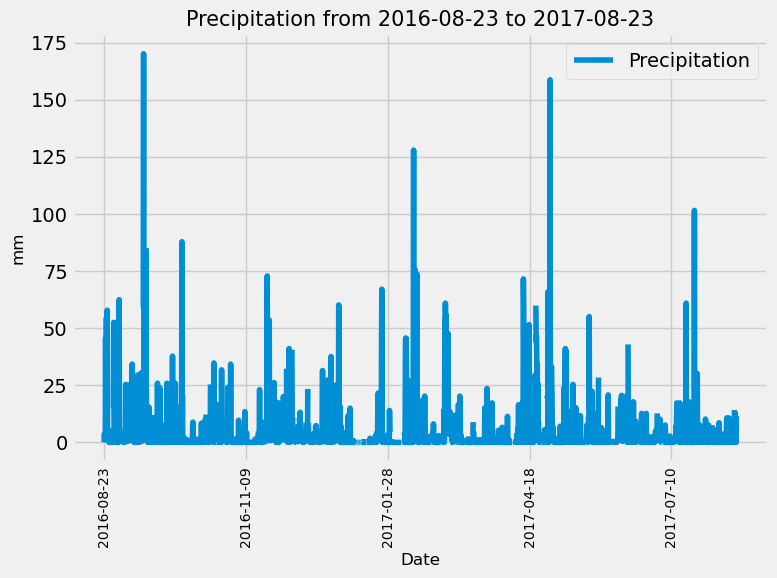

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
recent_dates = session.query(Measurement.date).order_by(Measurement.date.desc()).all()

# Calculate the date one year from the last date in data set.
date_oneyear_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
query_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_oneyear_ago).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precipitation_lastyear = pd.DataFrame(query_data, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
sort_df = df_precipitation_lastyear.sort_values("Date")

# Use Pandas Plotting with Matplotlib to plot the data
sort_df.set_index('Date', inplace=True)
sort_df.plot(figsize=(8,6))
plt.xticks(rotation=90,fontsize=10)
plt.ylabel("mm",fontsize=12)
plt.xlabel("Date",fontsize=12)
plt.title("Precipitation from 2016-08-23 to 2017-08-23",fontsize=15) 
plt.tight_layout()
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df_precipitation_lastyear.describe()
summary_statistics

,Precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
for data in most_active_stations[0]:
    print(data)

USC00519281
2772


In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == 'USC00519281').all()

[(12.2, 29.4, 22.03582251082252)]

Text(0.5, 1.0, 'Temparature observation for station:USC00519281')

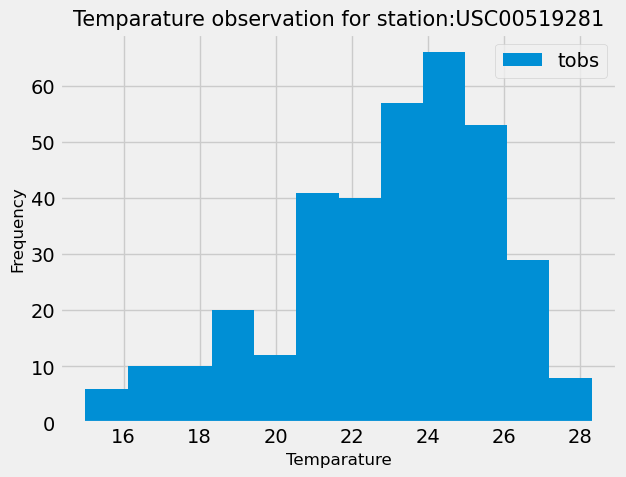

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_temp = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= date_oneyear_ago).all()
active_station_temp
active_station_temp_df = pd.DataFrame(active_station_temp, columns = ['tobs'])
active_station_temp_df
active_station_temp_df.plot.hist(bins=12, label="tobs")
plt.xlabel("Temparature",fontsize=12)
plt.ylabel("Frequency",fontsize=12)
plt.title("Temparature observation for station:USC00519281",fontsize=15)
# plt.tight_layout()
# plt.show()

# Close Session

In [19]:
# Close Session
session.close()